In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [189]:
df = pd.read_csv("/Users/saniyagapchup/Downloads/glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [190]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [191]:
df.columns.tolist()

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

In [192]:
df.Type.value_counts().sort_index()

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64

In [193]:
df['household'] = df.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
df.household.value_counts()

household
0    163
1     51
Name: count, dtype: int64

In [194]:
df.sort_values( by = 'Al', inplace=True)
X= np.array(df.Al).reshape(-1,1)
y = df.household

In [195]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)[:, 1]  

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
for threshold in thresholds:
   
    predictions = (probs >= threshold).astype(int)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, zero_division=0)
    recall = recall_score(y_test, predictions)
    
    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")


Threshold: 0.30, Accuracy: 0.93, Precision: 0.83, Recall: 0.91
Threshold: 0.40, Accuracy: 0.93, Precision: 0.83, Recall: 0.91
Threshold: 0.50, Accuracy: 0.91, Precision: 0.82, Recall: 0.82
Threshold: 0.60, Accuracy: 0.91, Precision: 0.89, Recall: 0.73
Threshold: 0.70, Accuracy: 0.91, Precision: 0.89, Recall: 0.73


Q.2 Do the same analysis for other columns

In [197]:
df.columns.tolist()

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type', 'household']

In [198]:
#elements
elements = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
for ele in elements:
    X= np.array(df[ele]).reshape(-1,1)
    y = df.household
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict probabilities
    probs = model.predict_proba(X_test)[:, 1]  # Probability of belonging to class 1 (household)

    # Define thresholds to try
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

    # Evaluate different thresholds
    for threshold in thresholds:
        # Convert probabilities to binary predictions using the threshold
        predictions = (probs >= threshold).astype(int)
        
        # Compute evaluation metrics
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        
        print(f"Element:{ele}, Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

Element:RI, Threshold: 0.30, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.40, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.50, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.60, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element:RI, Threshold: 0.70, Accuracy: 0.74, Precision: 0.00, Recall: 0.00
Element:Na, Threshold: 0.30, Accuracy: 0.88, Precision: 0.80, Recall: 0.73
Element:Na, Threshold: 0.40, Accuracy: 0.88, Precision: 0.80, Recall: 0.73
Element:Na, Threshold: 0.50, Accuracy: 0.86, Precision: 0.86, Recall: 0.55
Element:Na, Threshold: 0.60, Accuracy: 0.81, Precision: 0.80, Recall: 0.36
Element:Na, Threshold: 0.70, Accuracy: 0.79, Precision: 1.00, Recall: 0.18
Element:Mg, Threshold: 0.30, Accuracy: 0.91, Precision: 0.77, Recall: 0.91
Element:Mg, Threshold: 0.40, Accuracy: 0.86, Precision: 0.73, Recall: 0.73
Element:Mg, Threshold: 0.50, Accuracy: 0.84, Precision: 0.70, Recall: 0.64
Element:Mg, Threshold: 0.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

Q. 3  Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding).

In [200]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score


X = df.drop(columns=['Type', 'household'])
y = df['household']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Pipelines for preprocessing
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline including the preprocessor and classifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs'))
])

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9069767441860465


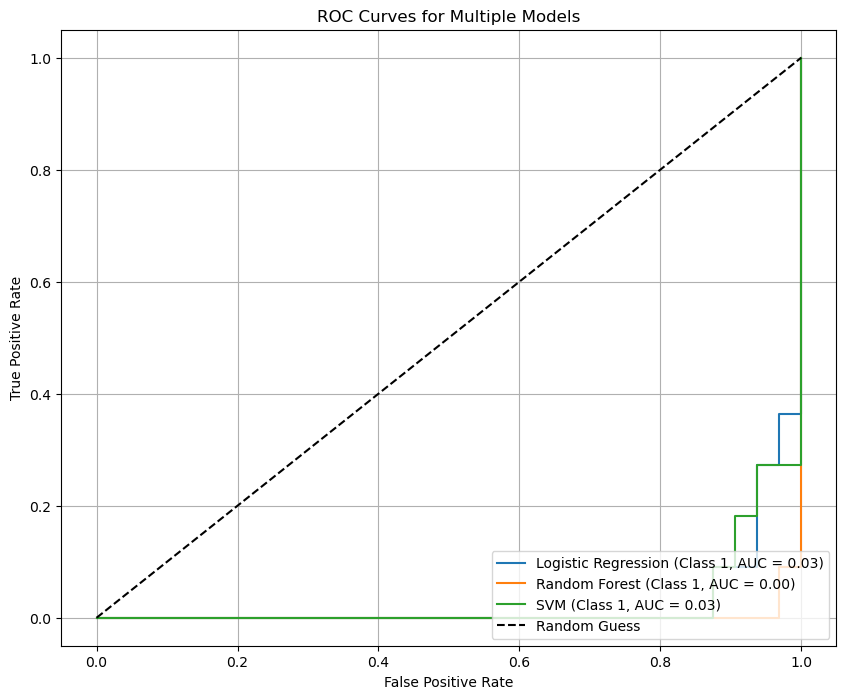

In [202]:
# Adjust code to handle models that do not natively support predict_proba or output a single array

plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    # For models that do not support `predict_proba`, use `decision_function` and standardize probabilities
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):
        decision = model.decision_function(X_test)
        y_score = StandardScaler().fit_transform(decision)
    else:
        continue  # Skip models without probabilistic outputs

    # Compute ROC curve and AUC for each class
    for i in range(y_test_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (Class {i+1}, AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Models')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Q. Clustering

In [277]:
from sklearn import cluster, datasets, preprocessing, metrics
import seaborn as sns
df2 = pd.read_csv('/Users/saniyagapchup/Downloads/iris.csv')
df2.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [279]:
print(df2['Name'].value_counts())

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [281]:
cols = df2.columns[:-1]

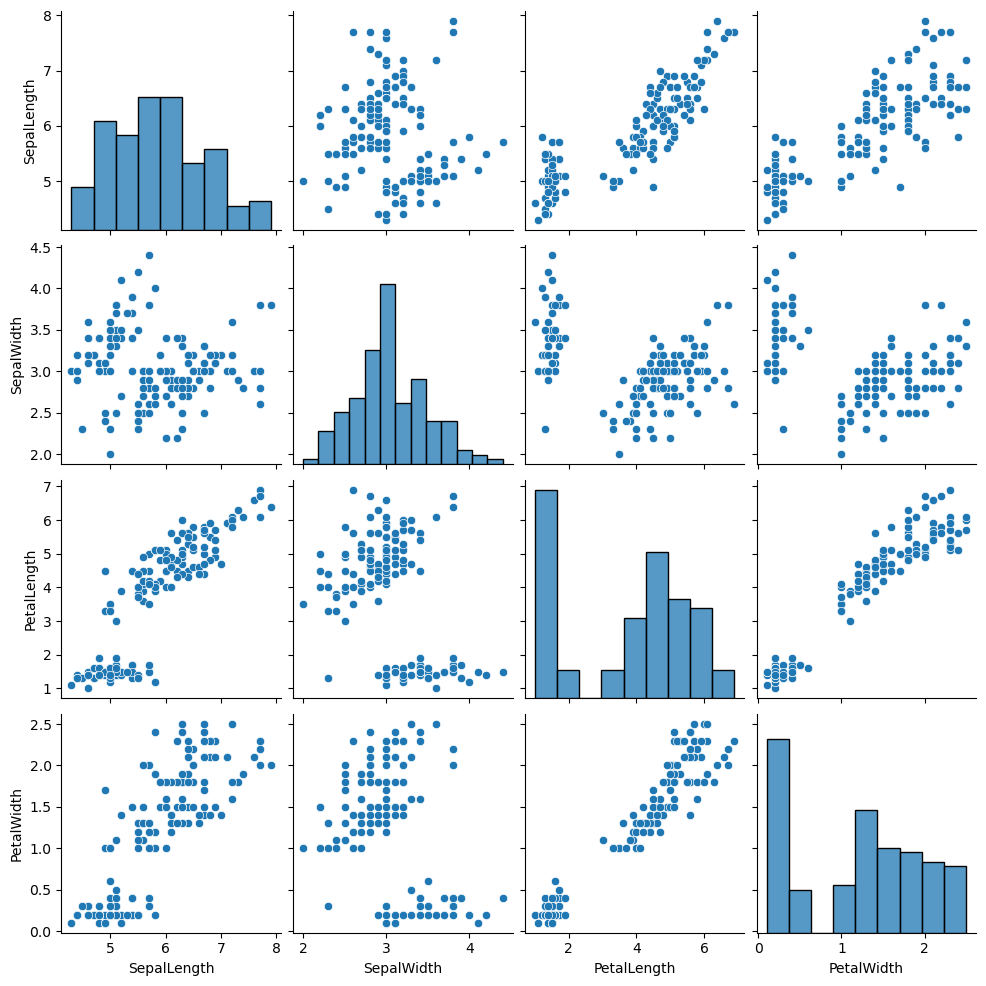

In [284]:
sns.pairplot(df2[cols])

In [285]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(df2[cols])

In [286]:
pd.DataFrame(X_scaled, columns=cols).describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [287]:
k = 5
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

KMeans(n_clusters=5)

In [288]:
score=[]
for k in range(2,20):
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  inertia = kmeans.inertia_
  score.append(metrics.silhouette_score(X_scaled, labels, metric='euclidean'))

Text(0, 0.5, 'Score')

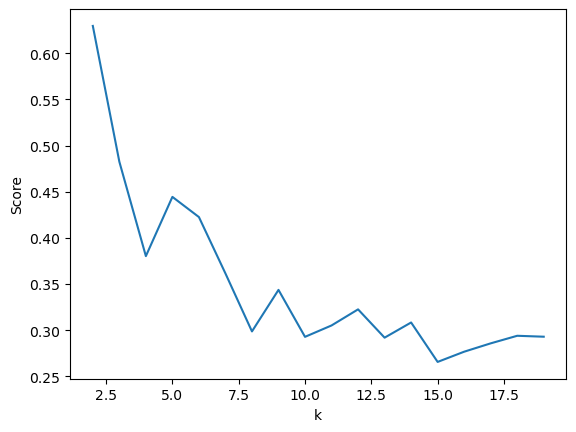

In [289]:
plt.plot(list(range(2,20)),score)
plt.xlabel('k')
plt.ylabel('Score')

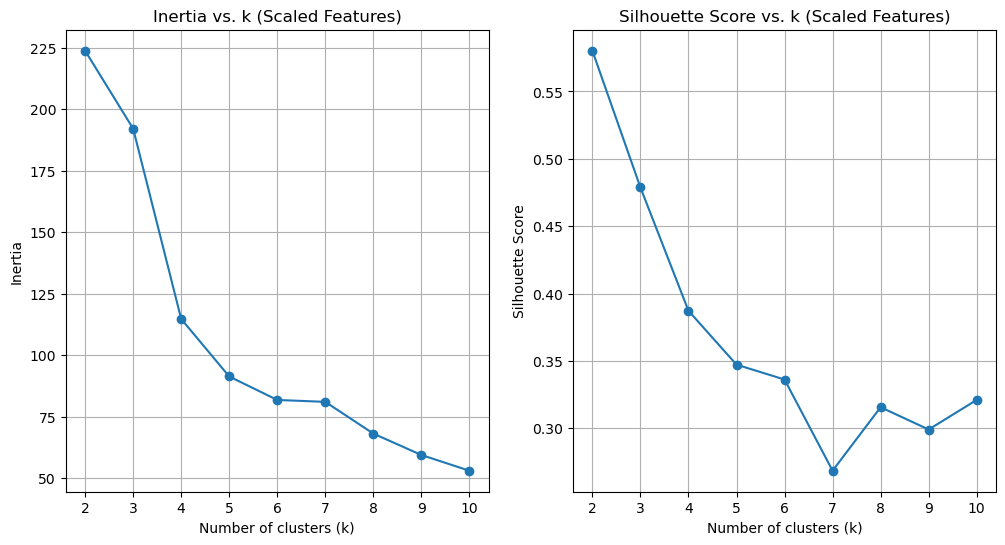

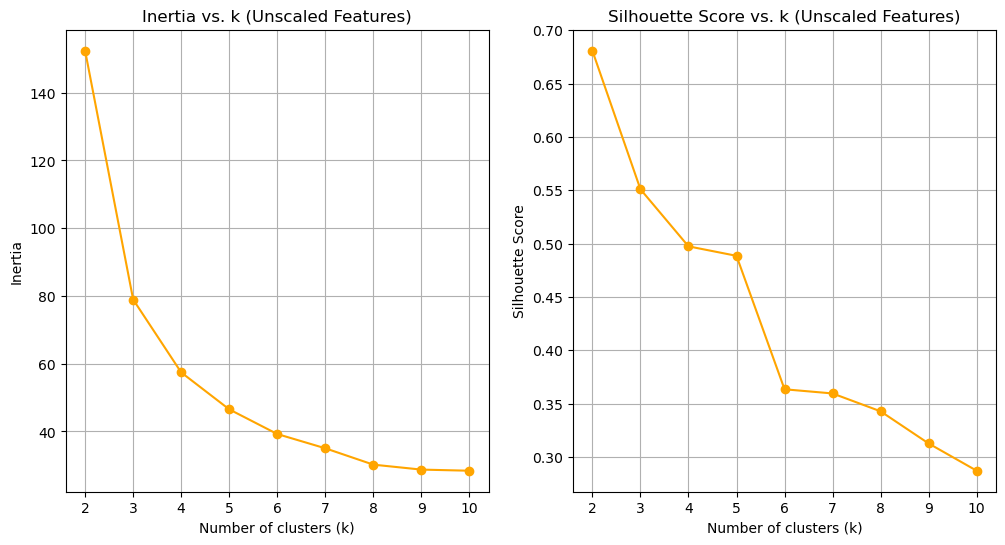

In [295]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Extract features for clustering
features = df2.drop(columns=['Name'])

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform clustering with varying k
k_values = range(2, 11)
inertia_scaled = []
silhouette_scaled = []
inertia_unscaled = []
silhouette_unscaled = []

for k in k_values:
    # Clustering on scaled features
    kmeans_scaled = KMeans(n_clusters=k, random_state=42)
    labels_scaled = kmeans_scaled.fit_predict(features_scaled)
    inertia_scaled.append(kmeans_scaled.inertia_)
    silhouette_scaled.append(silhouette_score(features_scaled, labels_scaled))
    
    # Clustering on unscaled features
    kmeans_unscaled = KMeans(n_clusters=k, random_state=42)
    labels_unscaled = kmeans_unscaled.fit_predict(features)
    inertia_unscaled.append(kmeans_unscaled.inertia_)
    silhouette_unscaled.append(silhouette_score(features, labels_unscaled))

# Plot results for scaled features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_scaled, marker='o')
plt.title('Inertia vs. k (Scaled Features)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scaled, marker='o')
plt.title('Silhouette Score vs. k (Scaled Features)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

# Plot results for unscaled features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_unscaled, marker='o', color='orange')
plt.title('Inertia vs. k (Unscaled Features)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_unscaled, marker='o', color='orange')
plt.title('Silhouette Score vs. k (Unscaled Features)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


### How do the inertia and silhouette scores change?

1. **Inertia:**
   - Inertia decreases as the number of clusters (\(k\)) increases for both scaled and unscaled features. This is expected because as \(k\) increases, the data points are assigned to clusters closer to them, reducing the sum of squared distances (inertia).
   - The rate of decrease is sharp initially (for smaller \(k\)) and slows down, creating an "elbow" point in the plot.

2. **Silhouette Scores:**
   - Silhouette scores typically peak at an optimal \(k\) and decrease for higher values of \(k\).
   - In the scaled features case, the silhouette score is higher, suggesting better-defined clusters. This is because scaling ensures all features contribute equally to the clustering process.
   - In the unscaled features case, silhouette scores are lower, indicating poorer clustering quality due to the dominance of features with larger ranges.

---

### What if you don't scale your features?

- **Without scaling:**
  - Features with larger ranges dominate the clustering process because \(k\)-means relies on distance metrics.
  - Inertia values are skewed because they reflect the influence of the dominant features, making them less reliable for interpreting the quality of clustering.
  - Silhouette scores are also lower without scaling, as the clustering is less representative of the true structure of the data.

- **With scaling:**
  - Scaling balances the contribution of all features, leading to more meaningful clusters.
  - Both inertia and silhouette score curves provide more accurate insights into the clustering quality.

---

### Is there a 'right' \(k\)? Why or why not?

- **No single "right" \(k\):**
  - The "optimal" \(k\) depends on the dataset and the problem context.
  - The elbow method (from the inertia plot) suggests a reasonable \(k\), where the decrease in inertia slows significantly (the "elbow").
  - Silhouette scores can guide the selection of \(k\), with higher scores indicating better-defined clusters.
  - Domain knowledge and practical considerations (e.g., interpretability of clusters) often play a significant role in choosing \(k\).

- **Trade-offs:**
  - A smaller \(k\) might overlook finer patterns in the data but provides more general clusters.
  - A larger \(k\) could overfit the data, breaking it into too many small, less meaningful clusters. 

In this case, \(k=3\) might be reasonable based on the silhouette scores and the "elbow" in the inertia plot for scaled features, but the final choice should consider the problem context.